<a href="https://colab.research.google.com/github/Andres-Cas/Food_Sales_Predictions/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [1]:
import pandas as pd

In [15]:
sales_df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Project1_Food Sales Prediction/sales_predictions.csv')
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
sales_df['Item_Weight'].fillna(0.0)

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
sales_df['Outlet_Size'].dropna()

0       Medium
1       Medium
2       Medium
4         High
5       Medium
         ...  
8517     Small
8518      High
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 6113, dtype: object

In [32]:
item_list = sales_df['Item_Type']
item_list.value_counts(sort=True)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [20]:
fat_content = sales_df['Item_Fat_Content']
fat_content.value_counts(sort= True)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['LF'], ['Low Fat'])
fat_content.value_counts(sort=True)

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['reg'], ['Regular'])
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['low fat'], ['Low Fat'])
fat_content.value_counts(sort=True)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
top10sales = sales_df.groupby(['Item_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending = False).head(10)
top10sales

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Name: Item_Outlet_Sales, dtype: float64

In [73]:
top10visable = sales_df.groupby(['Item_Type'])['Item_Visibility'].mean().sort_values(ascending = False).head(10)
top10visable

Item_Type
Breakfast                0.085723
Seafood                  0.074976
Dairy                    0.072427
Baking Goods             0.069169
Fruits and Vegetables    0.068513
Canned                   0.068129
Starchy Foods            0.067564
Snack Foods              0.066850
Breads                   0.066255
Frozen Foods             0.065645
Name: Item_Visibility, dtype: float64

In [24]:
salesBYoutlet = sales_df.groupby(['Outlet_Identifier', 'Item_Type'])[['Item_Outlet_Sales']].sum()
salesBYoutlet

Item_Outlet_Sales
Outlet_Identifier Item_Type                       
OUT010            Baking Goods          10693.4138
                  Breads                 7657.3658
                  Breakfast              4081.3540
                  Canned                 9019.5926
                  Dairy                 15307.4078
...                                            ...
OUT049            Others                47772.4816
                  Seafood               11827.2712
                  Snack Foods          350244.0900
                  Soft Drinks           97585.6402
                  Starchy Foods         42019.9696

[160 rows x 1 columns]

In [37]:
numberUniqueItem = sales_df.groupby(['Item_Type'])['Item_MRP'].nunique()
numberUniqueItem

Item_Type
Baking Goods              602
Breads                    226
Breakfast                 104
Canned                    598
Dairy                     625
Frozen Foods              780
Fruits and Vegetables    1110
Hard Drinks               206
Health and Hygiene        475
Household                 846
Meat                      377
Others                    160
Seafood                    61
Snack Foods              1079
Soft Drinks               418
Starchy Foods             141
Name: Item_MRP, dtype: int64

In [66]:
stores = sales_df['Outlet_Identifier'].value_counts()
stores

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

# Visuals

In [63]:
visibility = sales_df['Item_Visibility']
items = sales_df['Item_Type']
outlets = sales_df['Outlet_Identifier']
location_type = sales_df['Outlet_Location_Type']
outlet_type = sales_df['Outlet_Type']
outlet_sales = sales_df['Item_Outlet_Sales']

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

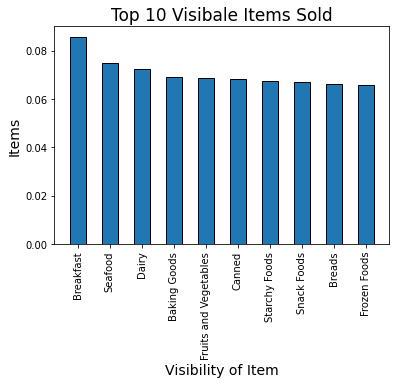

In [89]:
plt.bar(top10visable.index, top10visable.values, width=.5, align='center', edgecolor = 'black')
plt.ylabel('Items', fontsize = 14)
plt.xlabel('Visibility of Item', fontsize = 14)
plt.title('Top 10 Visibale Items Sold', fontsize = 17)
plt.xticks(rotation = 90);

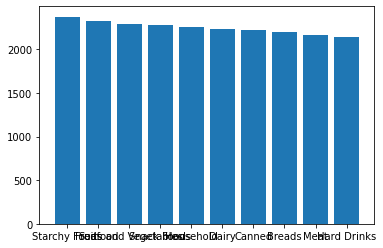

In [41]:
plt.bar(top10sales.index, top10sales.values);

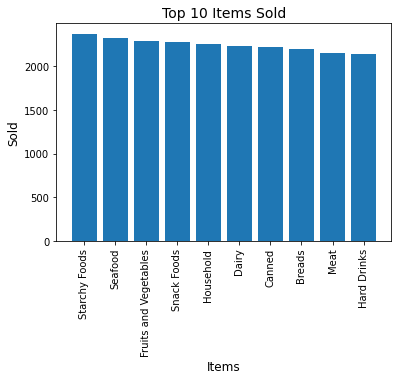

In [75]:
plt.bar(top10sales.index, top10sales.values)
plt.xticks(rotation = 90)
plt.title('Top 10 Items Sold', fontsize = 14)
plt.xlabel('Items', fontsize = 12)
plt.ylabel('Sold', fontsize = 12);

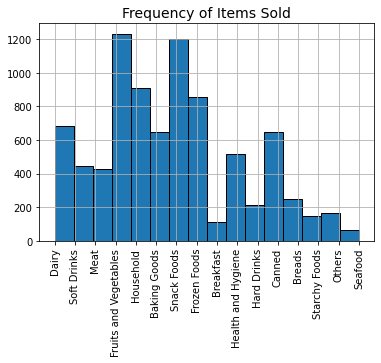

In [97]:
sales_df['Item_Type'].hist(bins = 16, edgecolor='black')
plt.xticks(rotation = 90)
plt.title('Frequency of Items Sold', fontsize = 14);

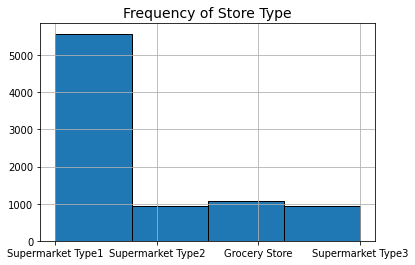

In [112]:
sales_df['Outlet_Type'].hist(bins=4, edgecolor='black')
plt.title('Frequency of Store Type', fontsize = 14);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


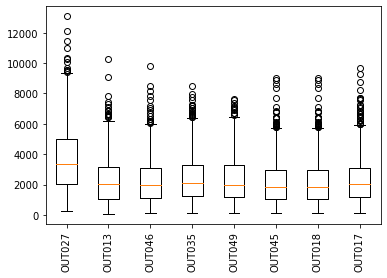

In [98]:
OUT027 = sales_df.loc[sales_df['Outlet_Identifier']=='OUT027', 'Item_Outlet_Sales'].values
OUT013 = sales_df.loc[sales_df['Outlet_Identifier']=='OUT013', 'Item_Outlet_Sales'].values 
OUT046 = sales_df.loc[sales_df['Outlet_Identifier']=='OUT046', 'Item_Outlet_Sales'].values  
OUT035 = sales_df.loc[sales_df['Outlet_Identifier']=='OUT035', 'Item_Outlet_Sales'].values   
OUT049 = sales_df.loc[sales_df['Outlet_Identifier']=='OUT049', 'Item_Outlet_Sales'].values   
OUT045 = sales_df.loc[sales_df['Outlet_Identifier']=='OUT045', 'Item_Outlet_Sales'].values   
OUT018 = sales_df.loc[sales_df['Outlet_Identifier']=='OUT045', 'Item_Outlet_Sales'].values   
OUT017 = sales_df.loc[sales_df['Outlet_Identifier']=='OUT017', 'Item_Outlet_Sales'].values   
plt.boxplot([OUT027,OUT013,OUT046,OUT035,OUT049,OUT045,OUT018,OUT017],
            labels=['OUT027','OUT013','OUT046','OUT035','OUT049','OUT045','OUT018','OUT017'])
plt.xticks(rotation = 90);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


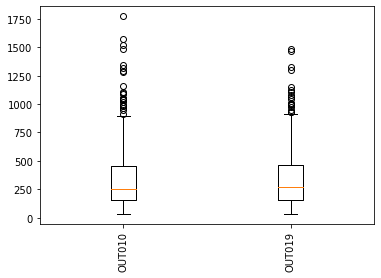

In [44]:
OUT010 = sales_df.loc[sales_df['Outlet_Identifier']=='OUT010', 'Item_Outlet_Sales'].values   
OUT019 = sales_df.loc[sales_df['Outlet_Identifier']=='OUT019', 'Item_Outlet_Sales'].values  
plt.boxplot([OUT010,OUT019],
            labels = ['OUT010','OUT019'])
plt.xticks(rotation = 90);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


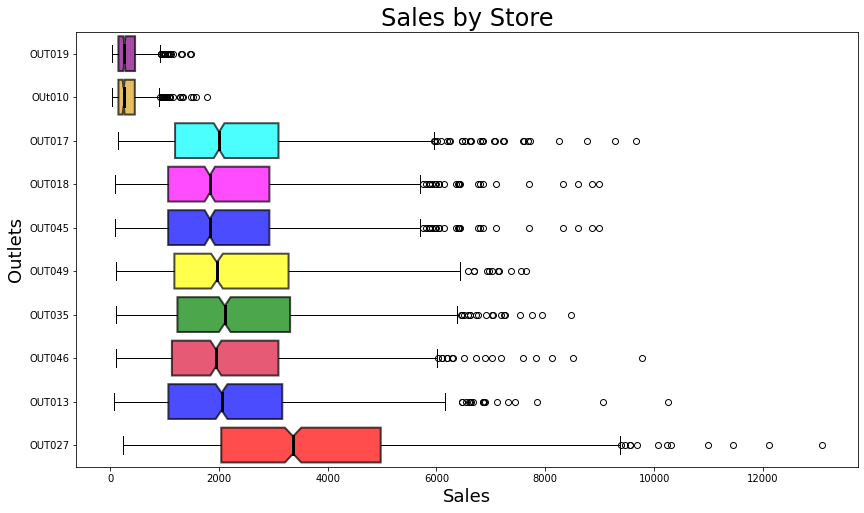

In [106]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (14,8))
boxplots = axes.boxplot([OUT027,OUT013,OUT046,OUT035,OUT049,OUT045,OUT018,OUT017,OUT010, OUT019],
                        notch=True,
                        vert = False,
                        labels=['OUT027','OUT013','OUT046','OUT035','OUT049','OUT045','OUT018','OUT017','OUt010', 'OUT019'],
                        widths=.8,
                        patch_artist= True,
                        medianprops = dict(linestyle='-', linewidth=3, color='Black'),
                        boxprops= dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .7))
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
boxplot2 = boxplots['boxes'][1]
boxplot2.set_facecolor('blue')
boxplot3 = boxplots['boxes'][2]
boxplot3.set_facecolor('crimson')
boxplot4 = boxplots['boxes'][3]
boxplot4.set_facecolor('green')
boxplot5 = boxplots['boxes'][4]
boxplot5.set_facecolor('yellow')
boxplot6 = boxplots['boxes'][6]
boxplot6.set_facecolor('magenta')
boxplot7 = boxplots['boxes'][7]
boxplot7.set_facecolor('cyan')
boxplot8 = boxplots['boxes'][8]
boxplot8.set_facecolor('goldenrod')
boxplot9 = boxplots['boxes'][9]
boxplot9.set_facecolor('purple')
plt.xlabel('Sales', fontsize = 18)
plt.ylabel('Outlets', fontsize = 18)
plt.title('Sales by Store', fontsize = 24);